In [1]:
from scipy.io import arff
import pandas as pd
from GAN import GAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

data = arff.loadarff('Assignment 4 files/diabetes.arff')
df = pd.DataFrame(data[0])
to_norm = df.columns.values[:-1]
original_df = df.copy()
df['class'] = df['class'].apply(lambda x: x.decode("utf-8"))
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
class_col = df['class']
df = df.drop(columns=['class'], axis=1)
scaler = MinMaxScaler()
scaler.fit(df.values)
df = pd.DataFrame(scaler.transform(df.values), columns=df.columns)
df = pd.concat([df, class_col],axis=1)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [315]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_diabetes'

print(df.shape[1])

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = ['', epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
history = synthesizer.train(df, train_args)

9
0 [D loss: 0.666513, acc.: 70.31%] [G loss: 0.699593]
generated_data
100 [D loss: 0.743378, acc.: 45.31%] [G loss: 0.802177]
generated_data
200 [D loss: 0.674355, acc.: 60.94%] [G loss: 0.760751]
generated_data
300 [D loss: 0.686158, acc.: 48.44%] [G loss: 0.666576]
generated_data
400 [D loss: 0.690235, acc.: 53.12%] [G loss: 0.911485]
generated_data
500 [D loss: 0.732288, acc.: 48.44%] [G loss: 0.591586]
generated_data
600 [D loss: 0.685730, acc.: 51.56%] [G loss: 0.721899]
generated_data
700 [D loss: 0.697766, acc.: 50.00%] [G loss: 0.698159]
generated_data
800 [D loss: 0.694155, acc.: 53.12%] [G loss: 0.687804]
generated_data
900 [D loss: 0.684692, acc.: 50.00%] [G loss: 0.691702]
generated_data
1000 [D loss: 0.703036, acc.: 50.00%] [G loss: 0.701756]
generated_data
1100 [D loss: 0.655787, acc.: 67.19%] [G loss: 0.717311]
generated_data
1200 [D loss: 0.691253, acc.: 51.56%] [G loss: 0.702997]
generated_data
1300 [D loss: 0.695725, acc.: 64.06%] [G loss: 0.695353]
generated_data
14

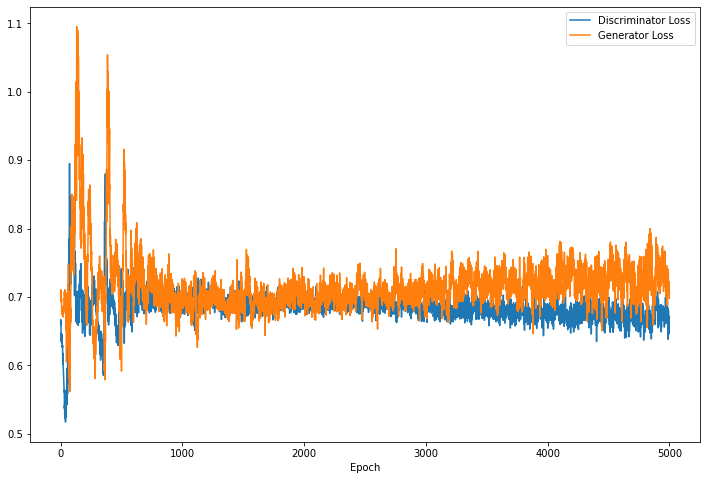

In [316]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(history['D_loss'], label='Discriminator Loss')
ax.plot(history['G_loss'], label='Generator Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

In [317]:
from sklearn.decomposition import PCA

In [318]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [319]:
X_embedded

array([[ 0.7069937 ,  0.15312978],
       [-0.40271091, -0.0881876 ],
       [ 0.68963127,  0.10496044],
       ...,
       [-0.34377156,  0.07261042],
       [ 0.62311372, -0.0179499 ],
       [-0.40738638, -0.17497506]])

In [320]:
len(df)

768

In [321]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 100 # number of fraud cases
noise_dim = 5

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [322]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

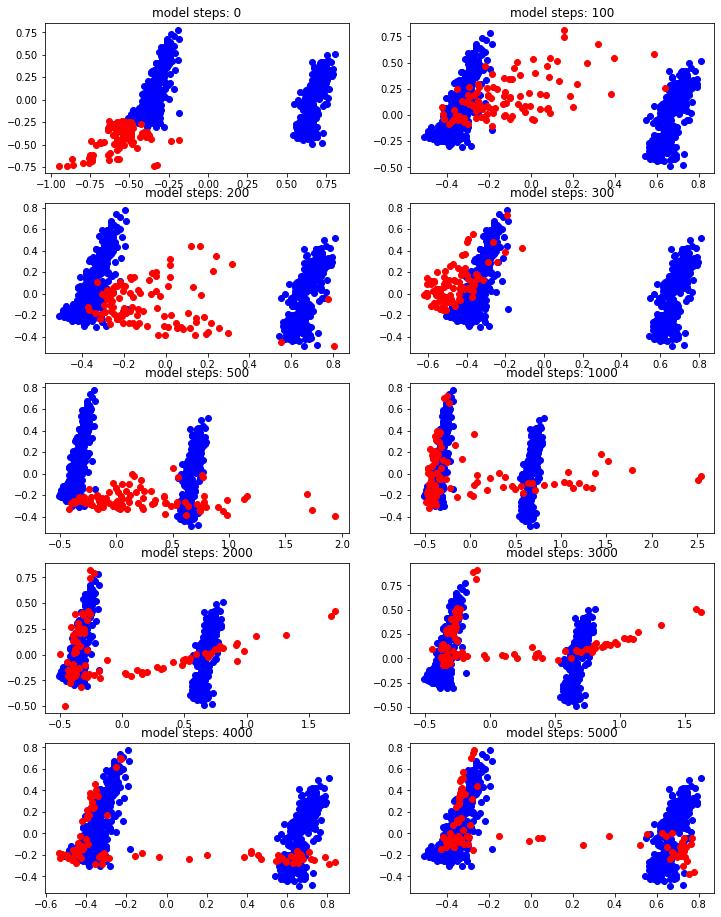

In [323]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [324]:
fooled_samples = scaler.inverse_transform(g_z[:,:-1])
generated_df = pd.DataFrame(fooled_samples)
generated_df['8'] = g_z[:,-1]
generated_df.columns = original_df.columns
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df = fooled_df.round()
generated_df[generated_df < 0] = 0
generated_df

,preg,plas,pres,skin,insu,mass,pedi,age,class,discriminator
0,5.0,91.0,60.0,35.0,82.0,43.0,1.0,31.0,0.0,1
1,7.0,135.0,76.0,31.0,180.0,39.0,1.0,64.0,1.0,0
2,6.0,204.0,91.0,26.0,380.0,47.0,1.0,59.0,1.0,0
3,0.0,107.0,59.0,32.0,61.0,30.0,0.0,23.0,0.0,1
4,0.0,106.0,60.0,30.0,67.0,30.0,0.0,23.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
95,2.0,93.0,75.0,14.0,23.0,34.0,0.0,34.0,0.0,1
96,10.0,108.0,91.0,36.0,153.0,46.0,1.0,51.0,0.0,0
97,7.0,104.0,73.0,22.0,111.0,36.0,0.0,55.0,0.0,1
98,5.0,89.0,107.0,41.0,0.0,48.0,0.0,74.0,0.0,0


In [325]:
g_z[:,:-1].shape

(100, 8)

In [326]:
class_col = generated_df['class']
tmp = generated_df.drop(columns=['class' ,'discriminator'], axis=1)
tmp = pd.DataFrame(g_z[:,:-1], columns=df.columns[:-1])
tmp = pd.concat([tmp, class_col],axis=1)
tmp

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.241176,0.407933,-0.024578,0.157303,0.022330,0.494131,0.309948,0.136068,0.0
1,0.233010,0.839286,0.694225,0.207864,0.049044,0.664712,0.492783,0.108237,1.0
2,0.199583,0.776890,0.691710,0.170918,0.014168,0.689691,0.528088,0.013477,1.0
3,0.184209,0.561643,0.531503,0.206199,0.044174,0.501965,0.179841,0.106344,0.0
4,0.219771,0.566695,0.529354,0.259968,0.060413,0.569137,0.177534,0.119054,0.0
...,...,...,...,...,...,...,...,...,...
95,0.350586,0.402480,0.554149,0.125353,0.100189,0.322090,0.174677,0.347491,0.0
96,0.597915,0.724364,0.915868,0.428863,0.125098,0.557012,0.183746,0.830801,0.0
97,0.332369,0.838564,0.668315,0.203620,0.099273,0.602298,0.440961,0.194962,0.0
98,0.183087,0.563802,0.526908,0.209028,0.046386,0.513312,0.180336,0.102401,0.0


In [342]:
pca = PCA(n_components=2, svd_solver='full')
original_emb = pca.fit_transform(df)
generated_positive_emb = pca.transform(tmp[tmp['class'].eq(1)])
generated_negative_emb = pca.transform(tmp[tmp['class'].eq(0)])
original_positive_emb = original_emb[df[df['class'].eq(1)].index.values]
original_negative_emb = original_emb[df[df['class'].eq(0)].index.values]
failed = pca.transform(tmp.iloc[generated_df[generated_df['discriminator'].eq(0)].index])

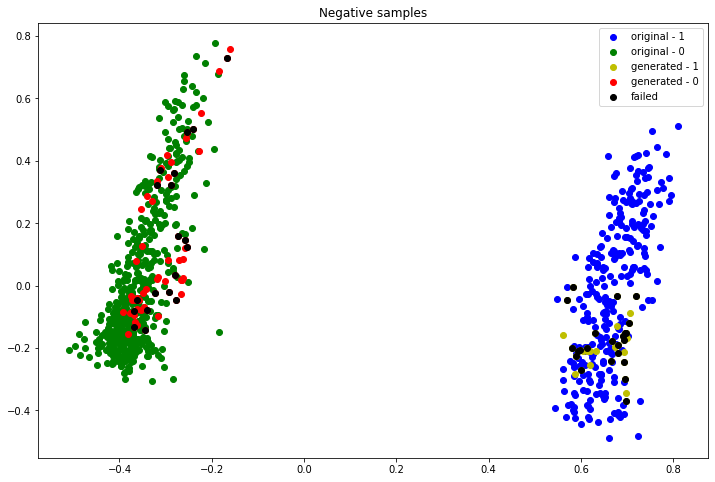

In [343]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Negative samples')
ax.scatter(original_positive_emb[:,0], original_positive_emb[:,1],label='original - 1', c='b')
ax.scatter(original_negative_emb[:,0], original_negative_emb[:,1],label='original - 0', c='g')

ax.scatter(generated_positive_emb[:,0], generated_positive_emb[:,1],label='generated - 1', c='y')
ax.scatter(generated_negative_emb[:,0], generated_negative_emb[:,1],label='generated - 0', c='r')
ax.scatter(failed[:,0], failed[:,1],label='failed', c='black')
plt.legend()
plt.show()

In [238]:
generated_df['discriminator'].value_counts()

1    58
0    42
Name: discriminator, dtype: int64

In [137]:
tmp_generated = generated_df[generated_df['discriminator'].eq(1)]
tmp_generated = tmp_generated[tmp_generated['class'].eq(0)]
tmp_generated = tmp_generated.drop(columns=['discriminator', 'class'], axis=1)
tmp_generated

,preg,plas,pres,skin,insu,mass,pedi,age
0,5.0,91.0,60.0,35.0,82.0,43.0,1.0,31.0
3,0.0,107.0,59.0,32.0,61.0,30.0,0.0,23.0
4,0.0,106.0,60.0,30.0,67.0,30.0,0.0,23.0
5,0.0,96.0,66.0,12.0,33.0,32.0,1.0,26.0
9,0.0,104.0,64.0,24.0,48.0,29.0,0.0,24.0
12,0.0,108.0,63.0,26.0,56.0,29.0,0.0,23.0
14,1.0,88.0,58.0,19.0,62.0,34.0,1.0,25.0
18,0.0,105.0,48.0,36.0,107.0,37.0,1.0,24.0
22,0.0,101.0,68.0,17.0,22.0,31.0,0.0,24.0
24,0.0,82.0,48.0,32.0,94.0,36.0,1.0,24.0


In [138]:
tmp_original = original_df
tmp_original = tmp_original[tmp_original['class'].eq(b'tested_negative')]
tmp_original = tmp_original.drop(columns=['class'], axis=1)
tmp_original

,preg,plas,pres,skin,insu,mass,pedi,age
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
10,4.0,110.0,92.0,0.0,0.0,37.6,0.191,30.0
...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0


In [139]:
from sklearn.metrics.pairwise import euclidean_distances

In [140]:
euclidean_distances(X=tmp_original, Y=tmp_original).mean()

114.76525755980178

In [141]:
generated_distances = euclidean_distances(X=tmp_generated, Y=tmp_original)
print(f'distances shape: {generated_distances.shape}')
generated_distances.mean()

distances shape: (44, 500)


88.829179157246

### German Credit

In [16]:
data = arff.loadarff('Assignment 4 files/german_credit.arff')
df = pd.DataFrame(data[0])
df

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,b'A11',6.0,b'A34',b'A43',1169.0,b'A65',b'A75',4.0,b'A93',b'A101',...,b'A121',67.0,b'A143',b'A152',2.0,b'A173',1.0,b'A192',b'A201',b'1'
1,b'A12',48.0,b'A32',b'A43',5951.0,b'A61',b'A73',2.0,b'A92',b'A101',...,b'A121',22.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'2'
2,b'A14',12.0,b'A34',b'A46',2096.0,b'A61',b'A74',2.0,b'A93',b'A101',...,b'A121',49.0,b'A143',b'A152',1.0,b'A172',2.0,b'A191',b'A201',b'1'
3,b'A11',42.0,b'A32',b'A42',7882.0,b'A61',b'A74',2.0,b'A93',b'A103',...,b'A122',45.0,b'A143',b'A153',1.0,b'A173',2.0,b'A191',b'A201',b'1'
4,b'A11',24.0,b'A33',b'A40',4870.0,b'A61',b'A73',3.0,b'A93',b'A101',...,b'A124',53.0,b'A143',b'A153',2.0,b'A173',2.0,b'A191',b'A201',b'2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'A14',12.0,b'A32',b'A42',1736.0,b'A61',b'A74',3.0,b'A92',b'A101',...,b'A121',31.0,b'A143',b'A152',1.0,b'A172',1.0,b'A191',b'A201',b'1'
996,b'A11',30.0,b'A32',b'A41',3857.0,b'A61',b'A73',4.0,b'A91',b'A101',...,b'A122',40.0,b'A143',b'A152',1.0,b'A174',1.0,b'A192',b'A201',b'1'
997,b'A14',12.0,b'A32',b'A43',804.0,b'A61',b'A75',4.0,b'A93',b'A101',...,b'A123',38.0,b'A143',b'A152',1.0,b'A173',1.0,b'A191',b'A201',b'1'
998,b'A11',45.0,b'A32',b'A43',1845.0,b'A61',b'A73',4.0,b'A93',b'A101',...,b'A124',23.0,b'A143',b'A153',1.0,b'A173',1.0,b'A192',b'A201',b'2'


In [17]:
columns = df.columns

In [18]:
import re
for column in columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode("utf-8"))
        df[column] = df[column].apply(lambda v: int(re.findall('[0-9]+', v)[0]))

In [20]:
scaler = MinMaxScaler()
scaler.fit(df.values)

MinMaxScaler()

In [22]:
norm_values = scaler.transform(df.values)

In [23]:
df = pd.DataFrame(norm_values)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.029412,1.00,0.008108,0.050567,1.00,1.00,1.000000,0.666667,0.0,...,0.000000,0.857143,1.0,0.5,0.333333,0.666667,0.0,1.0,0.0,0.0
1,0.333333,0.647059,0.50,0.008108,0.313690,0.00,0.50,0.333333,0.333333,0.0,...,0.000000,0.053571,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,1.0
2,1.000000,0.117647,1.00,0.016216,0.101574,0.00,0.75,0.333333,0.666667,0.0,...,0.000000,0.535714,1.0,0.5,0.000000,0.333333,1.0,0.0,0.0,0.0
3,0.000000,0.558824,0.50,0.005405,0.419941,0.00,0.75,0.333333,0.666667,1.0,...,0.333333,0.464286,1.0,1.0,0.000000,0.666667,1.0,0.0,0.0,0.0
4,0.000000,0.294118,0.75,0.000000,0.254209,0.00,0.50,0.666667,0.666667,0.0,...,1.000000,0.607143,1.0,1.0,0.333333,0.666667,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.000000,0.117647,0.50,0.005405,0.081765,0.00,0.75,0.666667,0.333333,0.0,...,0.000000,0.214286,1.0,0.5,0.000000,0.333333,0.0,0.0,0.0,0.0
996,0.000000,0.382353,0.50,0.002703,0.198470,0.00,0.50,1.000000,0.000000,0.0,...,0.333333,0.375000,1.0,0.5,0.000000,1.000000,0.0,1.0,0.0,0.0
997,1.000000,0.117647,0.50,0.008108,0.030483,0.00,1.00,1.000000,0.666667,0.0,...,0.666667,0.339286,1.0,0.5,0.000000,0.666667,0.0,0.0,0.0,0.0
998,0.000000,0.602941,0.50,0.008108,0.087763,0.00,0.50,1.000000,0.666667,0.0,...,1.000000,0.071429,1.0,1.0,0.000000,0.666667,0.0,1.0,0.0,1.0


In [24]:
import re

In [ ]:
#Define the GAN and training parameters
noise_dim = 10
dim = 21
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir= 'model_credit'

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim]
train_args = [models_dir, epochs, log_step]

model = GAN

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)
synthesizer.train(df, train_args)

In [26]:
from sklearn.decomposition import PCA

In [27]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [28]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 500 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [29]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

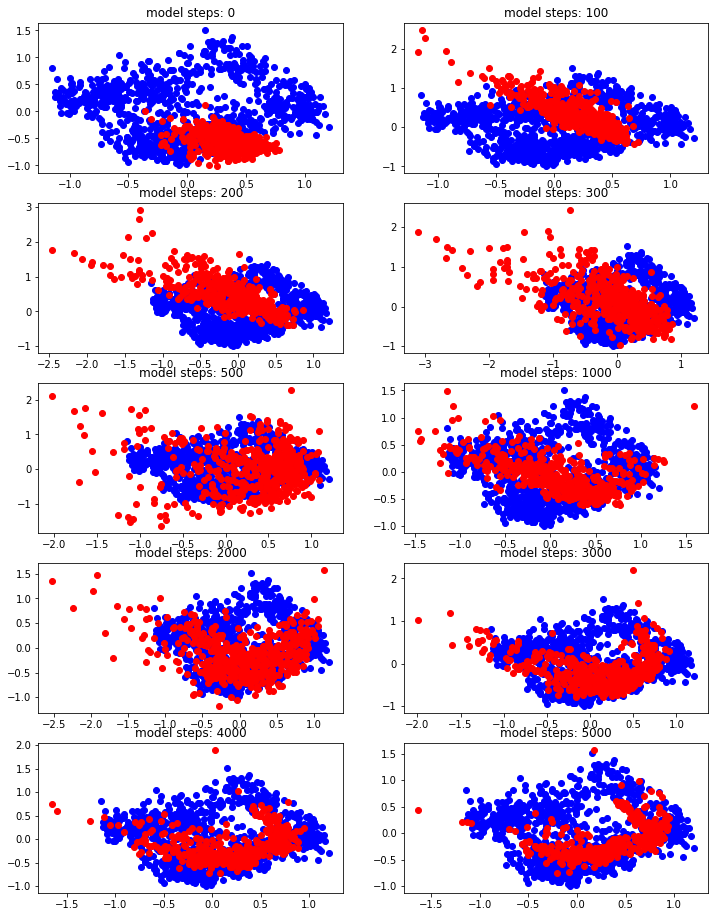

In [30]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + 'model_credit_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict(z)
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [35]:
g_z.shape

(500, 21)

In [36]:
fooled_samples = scaler.inverse_transform(g_z)
generated_df = pd.DataFrame(fooled_samples)
generated_df['8'] = g_z[:,-1]
generated_df.columns = original_df.columns[:-1]
generated_df['discriminator'] = synthesizer.discriminator.predict(g_z)
generated_df['discriminator'] = generated_df['discriminator'].apply(lambda v: 1 if v > 0.5 else 0)
generated_df = fooled_df.round()
generated_df[generated_df < 0] = 0
generated_df

ValueError: Length mismatch: Expected axis has 22 elements, new values have 8 elements

In [145]:
import re

In [173]:
s = 'he error1 '
print(bool(re.search('error1', s)))

True


### PART 2

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [181]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.30, random_state=42)
print(f'train shape: {X_train.shape}')
print(f'test shape: {X_test.shape}')

train shape: (537, 8)
test shape: (231, 8)


In [182]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train.values, y_train.values)

RandomForestClassifier(max_depth=3, random_state=0)

In [183]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

class Generator_RF():
    def __init__(self, batch_size, C):
        self.batch_size = batch_size
        self.C = C

    def build_model(self, input_shape, dim, data_dim):
        input_Z = Input(shape=input_shape, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_Z, input_C])
        x = Dense(dim * 2, activation='relu')(x)
        x = Dense(dim * 4, activation='relu')(x)
        x = Dense(data_dim)(x)
        return Model(inputs=[input_Z, input_C], outputs=x)

In [184]:
class Discriminator_RF():
    def __init__(self, batch_size, C):
        self.batch_size = batch_size
        self.C = C

    def build_model(self, input_shape, dim):
        input_sample = Input(shape=input_shape, batch_size=self.batch_size)
        input_Y = Input(shape=1, batch_size=self.batch_size)
        input_C = Input(shape=1, batch_size=self.batch_size)
        x = Concatenate(axis=1)([input_sample, input_Y, input_C])
        x = Dense(dim * 4, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim * 2, activation='relu')(x)
        x = Dropout(0.1)(x)
        x = Dense(dim, activation='relu')(x)
        x = Dense(1, activation='sigmoid')(x)
        return Model(inputs=[input_sample, input_Y, input_C], outputs=x)

In [185]:
import tensorflow as tf
class GAN_RF():

    def __init__(self, gan_args):
        [self.batch_size, lr, self.noise_dim,
         self.data_dim, layers_dim, self.C] = gan_args

        self.generator = Generator_RF(self.batch_size, self.C). \
            build_model(input_shape=(self.noise_dim,), dim=layers_dim, data_dim=self.data_dim)

        self.discriminator = Discriminator_RF(self.batch_size, self.C). \
            build_model(input_shape=(self.data_dim,), dim=layers_dim)

        optimizer = Adam(lr, 0.5)

        # Build and compile the discriminator
        self.discriminator.compile(loss='binary_crossentropy',
                                   optimizer=optimizer,
                                   metrics=['accuracy'])

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.noise_dim,))
        c = Input(shape=(1,))
        record = self.generator([z, c])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        y = Input(shape=(1,))
        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator([record, y, c])

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model([z, y,c], validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def get_data_batch(self, train, batch_size, seed=0):
        # # random sampling - some samples will have excessively low or high sampling, but easy to implement
        # np.random.seed(seed)
        # x = train.loc[ np.random.choice(train.index, batch_size) ].values
        # iterate through shuffled indices, so every sample gets covered evenly

        start_i = (batch_size * seed) % len(train)
        stop_i = start_i + batch_size
        shuffle_seed = (batch_size * seed) // len(train)
        np.random.seed(shuffle_seed)
        train_ix = np.random.choice(list(train.index), replace=False, size=len(train))  # wasteful to shuffle every time
        train_ix = list(train_ix) + list(train_ix)  # duplicate to cover ranges past the end of the set
        x = train.loc[train_ix[start_i: stop_i]].values
        return np.reshape(x, (batch_size, -1))

    def train(self, data, train_arguments):
        [cache_prefix, epochs, sample_interval] = train_arguments

        data_cols = data.columns

        # Adversarial ground truths
        valid = np.ones((self.batch_size, 1))
        fake = np.zeros((self.batch_size, 1))
        # C = np.full((self.batch_size, 1), 0.8)
        history = {'D_loss': [],
                   'D_acc': [],
                   'G_loss': []}
        for epoch in range(epochs):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            C = np.random.uniform(0, 1, self.batch_size)
            batch_data = self.get_data_batch(data, self.batch_size)
            noise = tf.random.normal((self.batch_size, self.noise_dim))

            # Generate a batch of new images
            gen_data = self.generator.predict([noise, C])
            batch_x = batch_data[:,:-1]
            bb_y = clf.predict_proba(batch_x)
            # Train the discriminator
            bb_gen_data_y = clf.predict_proba(gen_data[:,:-1])
            d_loss_real = self.discriminator.train_on_batch([batch_data, bb_y[:,0], C], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_data, bb_gen_data_y[:,0], C], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------
            noise = tf.random.normal((self.batch_size, self.noise_dim))
            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch([noise, valid, C], valid)
            
            if epoch % 100 == 0:
                # Plot the progress
                print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100 * d_loss[1], g_loss))
            history['D_loss'].append(d_loss[0])
            history['D_acc'].append(100 * d_loss[1])
            history['G_loss'].append(g_loss)
            # If at save interval => save generated events
            if epoch % sample_interval == 0:
                # Test here data generation step
                # save model checkpoints
                model_checkpoint_base_name = 'model/' + cache_prefix + '_{}_model_weights_step_{}.h5'
                self.generator.save_weights(model_checkpoint_base_name.format('generator', epoch))
                self.discriminator.save_weights(model_checkpoint_base_name.format('discriminator', epoch))

        return history

    def save(self, path, name):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        model_path = os.path.join(path, name)
        self.generator.save_weights(model_path)  # Load the generator
        return

    def load(self, path):
        assert os.path.isdir(path) == True, \
            "Please provide a valid path. Path must be a directory."
        self.generator = Generator(self.batch_size)
        self.generator = self.generator.load_weights(path)
        return self.generator

In [186]:
#Define the GAN and training parameters
noise_dim = 5
dim = 10
batch_size = 32

log_step = 100
epochs = 5000+1
learning_rate = 5e-4
models_dir = 'model_diabetes'
C = 0.7

gan_args = [batch_size, learning_rate, noise_dim, df.shape[1], dim, C]
train_args = ['', epochs, log_step]

model = GAN_RF

#Training the GAN model chosen: Vanilla GAN, CGAN, DCGAN, etc.
synthesizer = model(gan_args)

In [187]:
history = synthesizer.train(df, train_args)

0 [D loss: 0.683774, acc.: 50.00%] [G loss: 0.575811]
100 [D loss: 0.678970, acc.: 54.69%] [G loss: 0.732207]
200 [D loss: 0.694732, acc.: 53.12%] [G loss: 0.666466]
300 [D loss: 0.692958, acc.: 51.56%] [G loss: 0.658693]
400 [D loss: 0.691334, acc.: 48.44%] [G loss: 0.662901]
500 [D loss: 0.692485, acc.: 46.88%] [G loss: 0.656460]
600 [D loss: 0.689458, acc.: 48.44%] [G loss: 0.670757]
700 [D loss: 0.699871, acc.: 40.62%] [G loss: 0.682212]
800 [D loss: 0.686692, acc.: 48.44%] [G loss: 0.655550]
900 [D loss: 0.695950, acc.: 43.75%] [G loss: 0.677961]
1000 [D loss: 0.689486, acc.: 56.25%] [G loss: 0.677975]
1100 [D loss: 0.688441, acc.: 53.12%] [G loss: 0.651317]
1200 [D loss: 0.689315, acc.: 51.56%] [G loss: 0.658052]
1300 [D loss: 0.678823, acc.: 65.62%] [G loss: 0.638240]
1400 [D loss: 0.688237, acc.: 54.69%] [G loss: 0.670332]
1500 [D loss: 0.673813, acc.: 59.38%] [G loss: 0.666547]
1600 [D loss: 0.684419, acc.: 59.38%] [G loss: 0.655295]
1700 [D loss: 0.683284, acc.: 51.56%] [G lo

In [188]:
from sklearn.decomposition import PCA

In [189]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded = scalar.transform(df.values)

In [190]:
import matplotlib.pyplot as plt
import numpy as np


# Setup parameters visualization parameters
seed = 17
test_size = 500 # number of fraud cases

np.random.seed(seed)
z = np.random.normal(size=(test_size, noise_dim))
real = synthesizer.get_data_batch(train=df, batch_size=test_size, seed=seed)
real_samples = pd.DataFrame(real)

In [191]:
models = {'GAN': ['GAN', False, synthesizer.generator]}

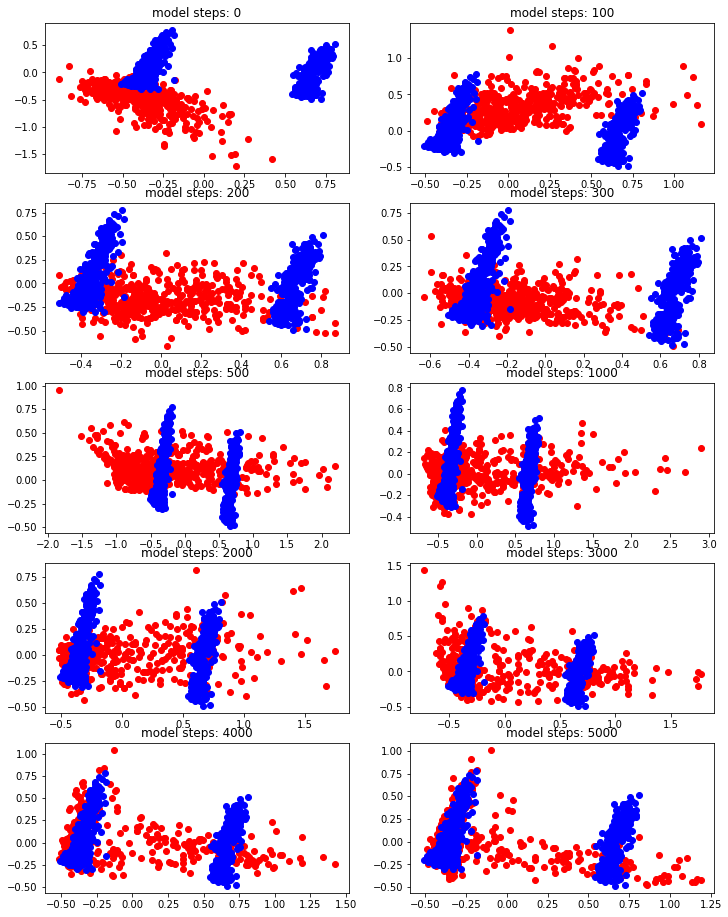

In [192]:
model_names = ['GAN']
colors = ['deepskyblue','blue']
markers = ['o','^']

col1, col2 = 'CITY', 'ETHNICITY'

base_dir = 'model/'

#Actual fraud data visualization
model_steps = [ 0, 100, 200, 300, 500, 1000, 2000, 3000, 4000, 5000]
rows = len(model_steps)
columns = 5

axarr = [[]]*len(model_steps)



fig, ax = plt.subplots(5, 2, figsize=(12, 16))


for model_step_ix, model_step in enumerate(model_steps):      
    [model_name, with_class, generator_model] = models['GAN']
    generator_model.load_weights( base_dir + '_generator_model_weights_step_'+str(model_step)+'.h5')
    g_z = generator_model.predict([z, np.random.uniform(0, 1, 500)])
    g_z_emb = scalar.transform(g_z)
    ax[model_step_ix // 2, model_step_ix % 2].scatter(g_z_emb[:, 0], g_z_emb[:, 1], c='r')
    ax[model_step_ix // 2, model_step_ix % 2].scatter(X_embedded[:,0], X_embedded[:,1], c='b')
    ax[model_step_ix // 2, model_step_ix % 2].set_title(f'model steps: {model_step}')

In [ ]:
import numpy as np

In [193]:
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [197]:
scalar = PCA(n_components=2, svd_solver='full')
scalar.fit(df.values)
X_embedded_1 = scalar.transform(df[df['class'].eq(1)].values)
X_embedded_2 = scalar.transform(df[df['class'].eq(0)].values)

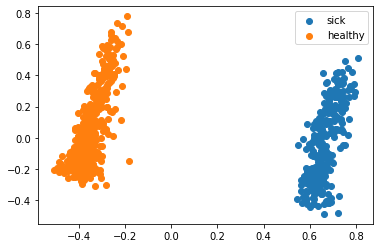

In [200]:
plt.scatter(X_embedded_1[:, 0], X_embedded_1[:, 1], label='sick')
plt.scatter(X_embedded_2[:, 0], X_embedded_2[:, 1], label='healthy')


plt.legend()
plt.show()